# ANOVA and ANOM

- Analysis of variance (ANOVA) is a technique that compares more than two sample 
means and determines whether one or more sample means is different than another 
mean.
- Analysis of means (ANOM) is similar but determines whether a mean is dif
ferent than the mean of the means.
- First, let’s consider ANOVA. The null hypothesis (Ho) is: All averages are equal. 
The alternative hypothesis (HA) is: At least one group average is different from 
another. If the P-value < alpha 0.05, reject the null and accept the alternative 
hypothesis.
- The assumptions for ANOVA (and ANOM) are each group of data is normally 
distributed, and there are equal variances across groups of data. ANOVA can still be 
run if the variances are not equal, but it requires a change to a default.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stats_tests import check_var, anova, anom
from stats_plots import qqplot, boxplot, plot_posthoc
plt.style.use('classic')

In [2]:
# Replace with your actual Excel path/sheet
xls = pd.ExcelFile("Six Sigma_Case Study.xlsx")
df = (
    pd.read_excel(
        xls,
        sheet_name="ANOVA",
        usecols = ["Lot 1 failed calipers", "Lot 2", "Lot 3", "Lot 4"]
    )
    .dropna(how="all")  # drop rows where all columns are NaN
)
# Strip whitespace from column names
df.columns = df.columns.str.strip()
df.head()
df.describe()

,Lot 1 failed calipers,Lot 2,Lot 3,Lot 4
count,30.000000,30.000000,30.000000,30.000000
mean,413.835037,417.821107,414.811175,413.120148
std,13.809220,10.558236,9.200734,8.625331
min,384.686017,396.902886,394.181997,395.683030
25%,405.974284,412.766892,408.470994,406.151710
50%,415.429623,418.946978,412.246052,414.365918
75%,422.238459,424.244103,421.009810,419.722118
max,446.047741,437.381634,431.361899,429.575449


## Checking the normality assumption


Mean: 413.8350
Stdev: 13.8092
A² (raw): 0.2965
A²* (adj.): 0.3046
Approx. p-value: 0.5697

Mean: 417.8211
Stdev: 10.5582
A² (raw): 0.2666
A²* (adj.): 0.2739
Approx. p-value: 0.6648

Mean: 414.8112
Stdev: 9.2007
A² (raw): 0.6158
A²* (adj.): 0.6328
Approx. p-value: 0.0991

Mean: 413.1201
Stdev: 8.6253
A² (raw): 0.3238
A²* (adj.): 0.3327
Approx. p-value: 0.5104


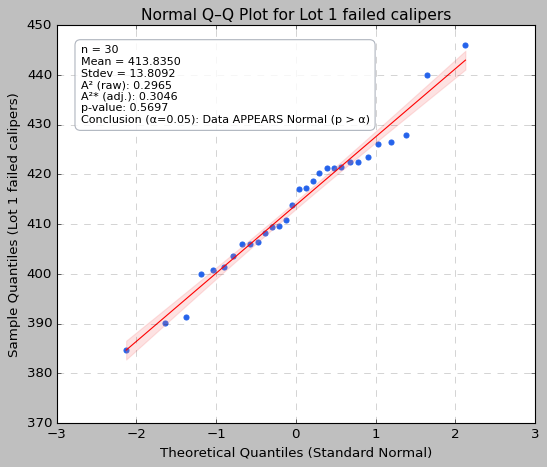

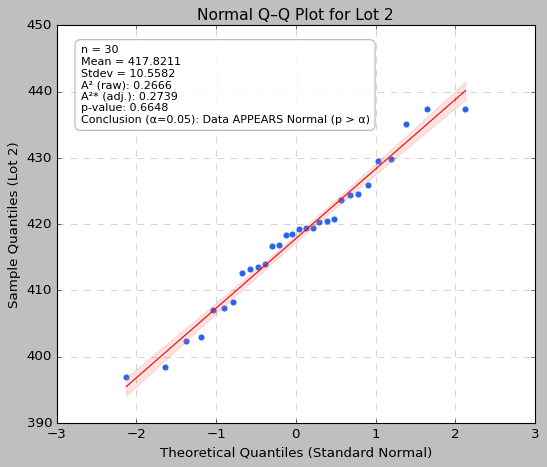

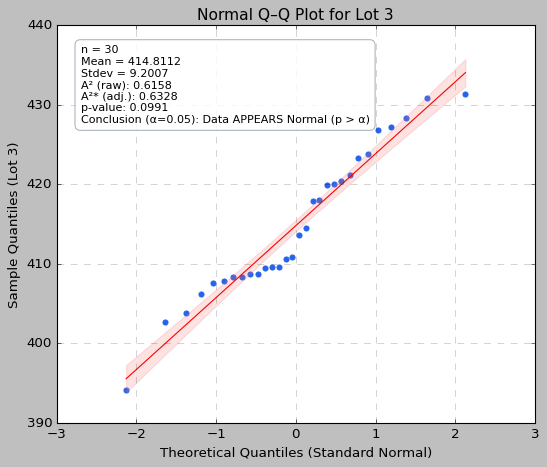

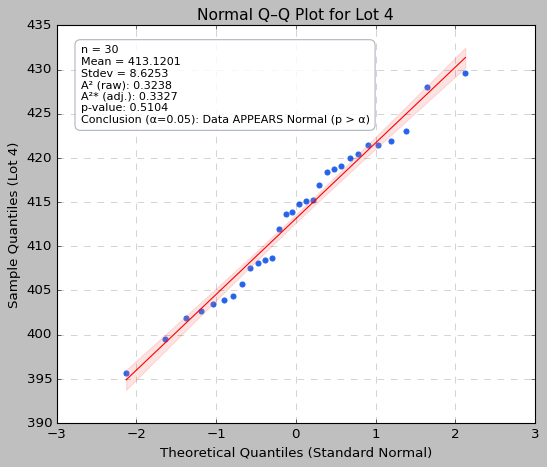

In [3]:
plot_1 = qqplot(df["Lot 1 failed calipers"], label="Lot 1 failed calipers")
plot_2 = qqplot(df["Lot 2"], label="Lot 2")
plot_3 = qqplot(df["Lot 3"], label="Lot 3")
plot_4 = qqplot(df["Lot 4"], label="Lot 4")

Normality: Confirmed$-$All P-values > alpha 0.05.

## Checking the equal variances assumption

In [4]:
# Suppose df has 4 groups (Lot 1–4)
results_1 = check_var(df, method="bartlett_minitab")


--- Summary Statistics (per group) ---
               Sample  N   StDev  CI Lower  CI Upper
Lot 1 failed calipers 30 13.8092   10.3660   20.2625
                Lot 2 30 10.5582    7.9256   15.4923
                Lot 3 30  9.2007    6.9066   13.5004
                Lot 4 30  8.6253    6.4747   12.6561

--- Variance Equality Test ---
Method: Bartlett’s Test (Minitab correction)
Statistic = 7.9441
p-value   = 0.0472
Conclusion (α=0.05): Variances NOT equal


- Note the P-value is < alpha 0.05, so conclude at least one variance is not equal to another.
- While this fails the second assumption, ANOVA can still be performed as shown in the following.

## ANOVA

In [5]:
results_1 = anova(df, alpha=0.05, method="games-howell")
# Unequal variance


--- ANOVA Results (Welch ANOVA + Games-Howell) ---
  Source  ddof1      ddof2         F    p-unc       np2
0  Group      3  63.739956  1.221308  0.30926  0.027999

F = 1.2213, p = 0.3093
Conclusion (α=0.05): Fail to reject H0 (No significant difference, p ≥ 0.050)

--- Post-hoc pairwise comparisons ---
                       A      B   mean(A)   mean(B)    diff      se       T  \
0  Lot 1 failed calipers  Lot 2  413.8350  417.8211 -3.9861  3.1737 -1.2560   
1  Lot 1 failed calipers  Lot 3  413.8350  414.8112 -0.9761  3.0296 -0.3222   
2  Lot 1 failed calipers  Lot 4  413.8350  413.1201  0.7149  2.9726  0.2405   
3                  Lot 2  Lot 3  417.8211  414.8112  3.0099  2.5569  1.1772   
4                  Lot 2  Lot 4  417.8211  413.1201  4.7010  2.4891  1.8886   
5                  Lot 3  Lot 4  414.8112  413.1201  1.6910  2.3025  0.7344   

        df    pval  hedges  
0  54.2700  0.5945 -0.3201  
1  50.5088  0.9883 -0.0821  
2  48.6387  0.9950  0.0613  
3  56.9351  0.6436  0.300

 ### Results
- P-value is > alpha 0.05; cannot conclude one is different than the other.


## Boxplot of data

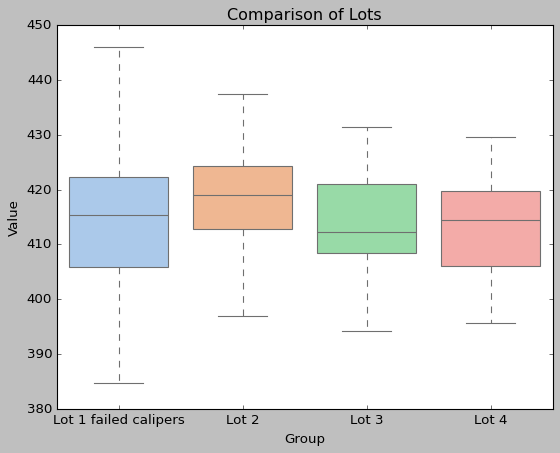

In [6]:
# Prepare the data: a list of arrays, one per column
data_list = [df[col].dropna().values for col in df.columns]

# Use the column names directly as group labels
group_labels = df.columns.tolist()

# Call your boxplot function
boxplot(
    data=data_list,
    groups=group_labels,
    title="Comparison of Lots",
)


### Graphical results
- No apparent difference visually.

## Determining which means are different
 - Fishers (when variances are considered equal) and games-Howell (when variances are unequal) show which means are 
different.
 - Means are considered different between any two samples if their confidence interval does not cross the zero line.
 - In this case all confidence intervals cross 0, so none can be considered different from any other.

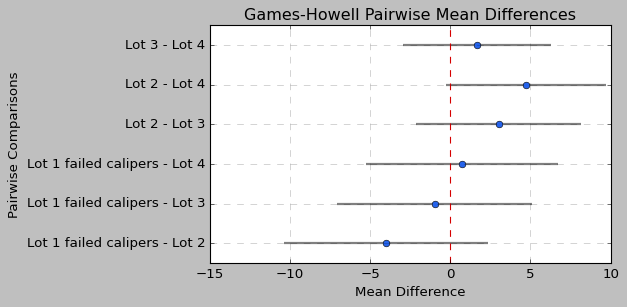

In [7]:
plot_posthoc(results_1["posthoc_table"], method="games-howell")

- Note: For the Games–Howell method, confidence intervals are computed using Pingouin’s implementation, which follows the Welch–Satterthwaite approximation. As a result, the CI bounds may differ slightly from those reported by Minitab due to differences in how degrees of freedom and critical values are estimated.

# ANOM

 This test determines whether a mean is different than the mean of the means. (This is different from ANOVA, which determines if at least one mean is different than another.) 


--- ANOM for Means (α=0.05) ---
Grand Mean: 414.8969, Pooled Std: 10.7380
                           Mean   n  Lower Limit  Upper Limit  Out of Limits
Lot 1 failed calipers  413.8350  30     409.4055     420.3882          False
Lot 2                  417.8211  30     409.4055     420.3882          False
Lot 3                  414.8112  30     409.4055     420.3882          False
Lot 4                  413.1201  30     409.4055     420.3882          False


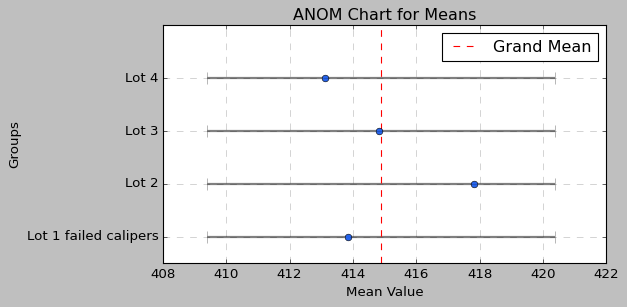

In [8]:
results_2 = anom(df, alpha=0.05)

- In this case, conclude no mean is different from the mean of the means.
- Or cannot conclude the batch of cast iron used for defective calipers had a different tensile strength from cast iron used for non-defective calipers.

### Summary
- No points outside the desicion limits.
- Conclude: No mean is different from the mean of the means.
- Conclude: Cannot conclude the batch of cast iron used for defective calipers had a different tensile strength from cast iron used for non-defective calipers.

# Kruskal-Wallis (Nonparametric Alternative to ANOVA)

What to do if the normality assumption is not met for ANOVA or ANOM? First, 
ensure there are no outliers in error. Or check to see if an outlier was a special cause 
and was corrected and is not expected to reoccur. For either are true, remove the 
point and check for normality again. If not, run Kruskal-Wallis, which is a nonpara
metric alternative to ANOVA. It seeks to determine if at least one median is different 
from the other. The assumption to use Kruskal-Wallis is that the sample distribu
tions should be similarly shaped.